<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [9]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [10]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





(100, 100, 3)
(100, 100)


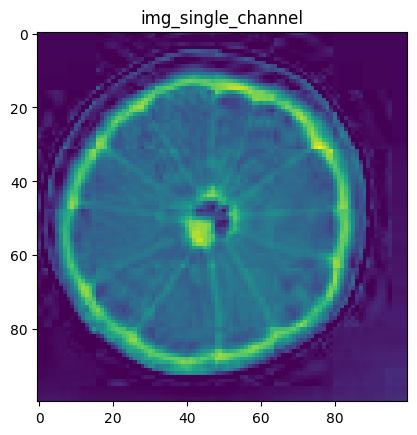

In [37]:
print(image.shape)

# img_single_channel=image[-1,-1,:]
img_single_channel = image[:,:,-1]

print(img_single_channel.shape)



plt.imshow(img_single_channel)
plt.title("img_single_channel")
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


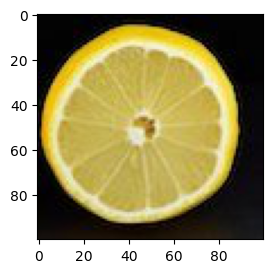

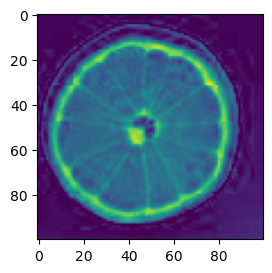

Single_channel_image of blue color gives the overall intensity of blue color of the image but not the other colors whereas the original color image contains all the color information.
Original is better since it contains all the information about the colors present in the image


In [45]:
img_average_channel=np.mean(image,axis=2)
print(img_average_channel.shape)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(img_single_channel)
plt.show()

print("Single_channel_image of blue color gives the overall intensity of blue color of the image but not the other colors whereas the original color image contains all the color information.")
print("Original is better since it contains all the information about the colors present in the image")

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [41]:

print("An identity matrix is a square matrix where all diagonal elements are 1, and all other elements are 0.")
print("Multiplying any matrix by an identity matrix results in the original matrix.")

# print(img_average_channel.shape[0])

identity_matrix = np.eye(img_average_channel.shape[0])

random_row_index = np.random.randint(0, identity_matrix.shape[0])


print(identity_matrix[random_row_index])

An identity matrix is a square matrix where all diagonal elements are 1, and all other elements are 0.
Multiplying any matrix by an identity matrix results in the original matrix.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [54]:

rows = np.arange(img_average_channel.shape[0])
np.random.shuffle(rows)
print(rows)

[84 25 39 61 74 67 88 19 38 34 22 36 45  3 48 71 41 15 63 49 69 99  0 91
 96  2 87 47 93 86 13 56 54 55 32 59 33 51 37  4 42 77 44 52 16 94 46 68
 27 28 90 81 79  6 21 83 57 18 30 66 26 65 17 10 29 23 31 76 24 72  5 60
  7 97 78 14 98 35 40 64 70 53 82 95 20 12 75 85 58 80 92  1 73 11 50 43
 62  8 89  9]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [55]:

T = identity_matrix[rows]
print("Shape of T:", T.shape)
# print(T[21]) # Testing
print("We are creating a matrix T which has the same elements as identity matrix but the position of element 1 is base don the value given by the matrix rows")


Shape of T: (100, 100)
We are creating a matrix T which has the same elements as identity matrix but the position of element 1 is base don the value given by the matrix rows


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


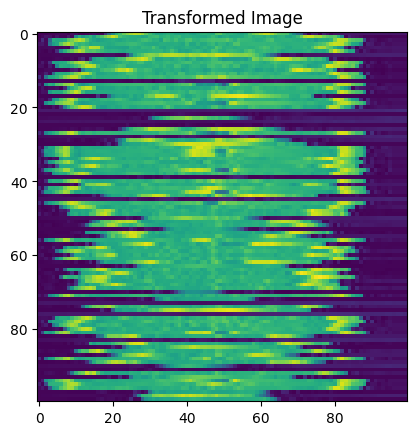

since the rows matrix is shuffled. Every run has a different pattern of transformed_image since the rows from the original image_average_channel are rearranged by multiplying them with matrix T, but transformed_image contains the same intensity as the original.


In [58]:
transformed_image = np.dot(T, img_average_channel)
print("Shape of transformed_image:", transformed_image.shape)

# plt.figure(figsize=(5, 5))
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()

print("since the rows matrix is shuffled. Every run has a different pattern of transformed_image since the rows from the original image_average_channel are rearranged by multiplying them with matrix T, but transformed_image contains the same intensity as the original.")

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Since the determinent of maatrix T is not zero and it is a square matrix, Matrix T is invertible.


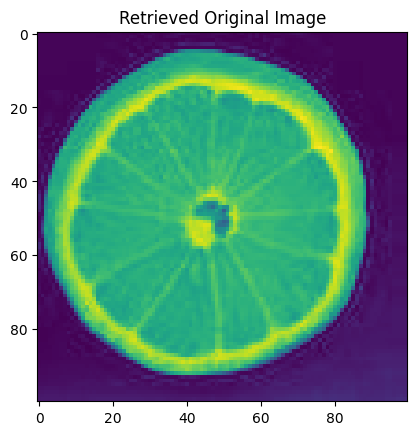

In [62]:

det_T = np.linalg.det(T)
if det_T != 0:
    print("Since the determinent of maatrix T is not zero and it is a square matrix, Matrix T is invertible.")
    Tinv = np.linalg.inv(T)
    retrieved_image = np.dot(Tinv, transformed_image)
    plt.imshow(retrieved_image)
    plt.title("Original Image")
    plt.show()
else:
    print("Matrix T is not invertible.")



## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


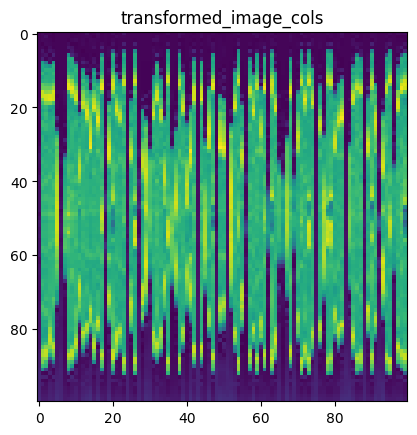

Matrix T_cols is invertible.


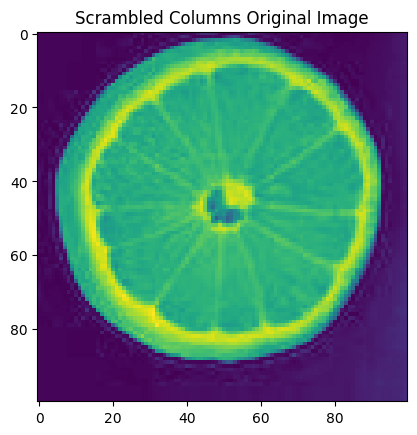

In [91]:

transposed_image = np.transpose(image, (1, 0, 2))
cols = np.arange(transposed_image.shape[0])
np.random.shuffle(cols)

T_scrambled_cols = identity_matrix[cols]
print(T_scrambled_cols[0])
T_columns_transposed = np.transpose(T_scrambled_cols, (1, 0))
img_average_channel_cols = np.mean(transposed_image, axis=2)
transformed_image_cols = np.dot(T_columns_transposed, img_average_channel_cols)
transformed_image_cols_transposed=np.transpose(transformed_image_cols,(1,0))
plt.imshow(transformed_image_cols_transposed)
plt.title("transformed_image_cols")
plt.show()


det_T_cols = np.linalg.det(T_columns_transposed)
if det_T_cols != 0:
    T_cols_inv = np.linalg.inv(T_columns_transposed)
    retrieved_image_cols = np.dot(T_cols_inv, transformed_image_cols)
    print("Matrix T_cols is invertible.")
    plt.imshow(retrieved_image_cols)
    plt.title("Scrambled Columns Original Image")
    plt.show()
else:
    print("Matrix T_cols is not invertible.")



## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

Shape of transformed_image: (100, 100)


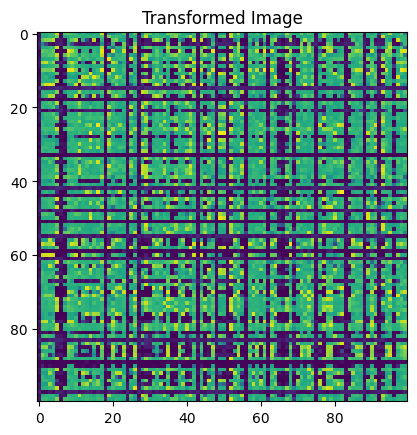

Since the determinent of maatrix T is not zero and it is a square matrix, Matrix T is invertible.


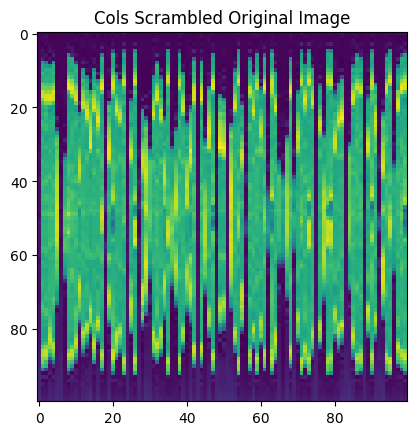

Matrix T_columns_transposed is invertible.


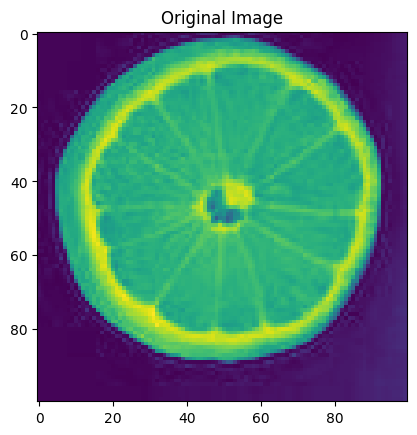

In [93]:
transformed_image_cols_transposed=np.transpose(transformed_image_cols,(1,0))
rows = np.arange(transformed_image_cols_transposed.shape[0])
np.random.shuffle(rows)
T = identity_matrix[rows]
transformed_image = np.dot(T, transformed_image_cols_transposed)
print("Shape of transformed_image:", transformed_image.shape)

# plt.figure(figsize=(5, 5))
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()

det_T = np.linalg.det(T)
if det_T != 0:
    print("Since the determinent of maatrix T is not zero and it is a square matrix, Matrix T is invertible.")
    Tinv = np.linalg.inv(T)
    retrieved_image = np.dot(Tinv, transformed_image)
    plt.imshow(retrieved_image)
    plt.title("Cols Scrambled Original Image")
    plt.show()
else:
    print("Matrix T is not invertible.")
    
det_T_cols = np.linalg.det(T_columns_transposed)
if det_T_cols != 0:
    T_cols_inv = np.linalg.inv(T_columns_transposed)
    
    retrieved_image_cols = np.dot(T_cols_inv, np.transpose(retrieved_image))
    print("Matrix T_columns_transposed is invertible.")
    plt.imshow(retrieved_image_cols)
    plt.title("Original Image")
    plt.show()
else:
    print("Matrix T_columns_transposed is not invertible.")


